<a href="https://colab.research.google.com/github/NovrianPratama/Learn-DeepLearning/blob/main/Dropout_BatchNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mencegah Overfitting

Melakukan pencegahan overfitting dengan Dropout dan Batch Normalization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Cek missing value dan duplicate
print(df.info())
print(f'\nCek missing value:\n {df.isna().sum()}')
print(f'\nCek duplicated:\n {df.duplicated().sum()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None

Cek missing value:
 Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

Cek duplicated:
 0


In [4]:
# Drop id pada dataset
df = df.drop('Id', axis=1)
df.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [5]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [6]:
# encode menggunakan one-hot encoding
category = pd.get_dummies(df.Species, dtype=int)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [7]:
new_df = pd.concat([df, category], axis=1)
new_df.drop(columns='Species', inplace=True)
new_df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [8]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [9]:
# Memishakan data training dan testing
X = dataset[:, 0:4]
y = dataset[:, 4:7]

In [10]:
# Normalisasi data fitur
scaled = MinMaxScaler()
X_scaled = scaled.fit_transform(X)
X_scaled

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [28]:
# Membagi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)
print(f'Ukuran X_train: {X_train.shape}')
print(f'Ukuran X_test: {X_test.shape}')

Ukuran X_train: (105, 4)
Ukuran X_test: (45, 4)


## Building Models

### Percobaan tanpa menggunakan Drop out dan Batch Normalizitaion

In [29]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
hist = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5987 - loss: 1.0482
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7176 - loss: 0.4532
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8026 - loss: 0.3975
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9081 - loss: 0.3291 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9341 - loss: 0.2379
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9351 - loss: 0.1700
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9729 - loss: 0.1421
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9698 - loss: 0.1302 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9636 - loss: 0.1095 
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9546 - loss: 0.0967
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9306 - loss: 0.1122
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9303 - lo

### Menggunakan Dropout

Nama dropout mengacu pada unit/perceptron yang di-dropout (dibuang) secara temporer pada sebuah layer.Contoh di mana besaran dropout yang dipilih adalah 0.5 sehingga 50% dari perceptron hidden layer kedua dimatikan secara berkala pada saat pelatihan. Dropout memilih neuron yang akan "dimatikan" secara acak selama setiap iterasi pelatihan.

In [31]:
model_dropout = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0.5), # Menggunakan metode dropout untuk mencegah overfitting
    Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1)
model_dropout.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
hist_drop = model_dropout.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4363 - loss: 1.3194
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6792 - loss: 0.7803
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7451 - loss: 0.5446 
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6621 - loss: 0.5236
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6365 - loss: 0.5431
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7711 - loss: 0.4454
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7353 - loss: 0.4819
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7388 - loss: 0.4299
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7755 - loss: 0.4232
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8390 - loss: 0.3545
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8630 - loss: 0.3434
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9206 - l

### Menggunakan Batch Normalize

BatchNormalization adalah layer yang digunakan dalam jaringan saraf tiruan (neural network) untuk mempercepat konvergensi pelatihan dan mengurangi sensitivitas terhadap inisialisasi parameter.

Proses normalisasi dalam BatchNormalization dilakukan dengan mengurangi nilai rata-rata dari setiap batch dan mengukur nilai varian. Kemudian layer ini akan melakukan normalisasi pada data dan melakukan pergeseran selama pelatihan. Hal ini membantu dalam mengatasi masalah seperti gradien menghilang (vanishing gradient) dan memungkinkan mempercepat konvergensi pada model jaringan saraf.

In [33]:
model_batch = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0.5), # Menggunakan metode dropout untuk mencegah overfitting
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1)
model_batch.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [34]:
hist_both = model_batch.fit(X_train, y_train, epochs=100)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4547 - loss: 1.1403
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6749 - loss: 0.6369
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7367 - loss: 0.5591
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7794 - loss: 0.4658 
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7738 - loss: 0.5271
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7687 - loss: 0.4450
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8640 - loss: 0.3616
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8797 - loss: 0.2881 
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8554 - loss: 0.2729
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8057 - loss: 0.4278
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9320 - loss: 0.1864 
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8560 - 

## Visualisasi Perbandingan

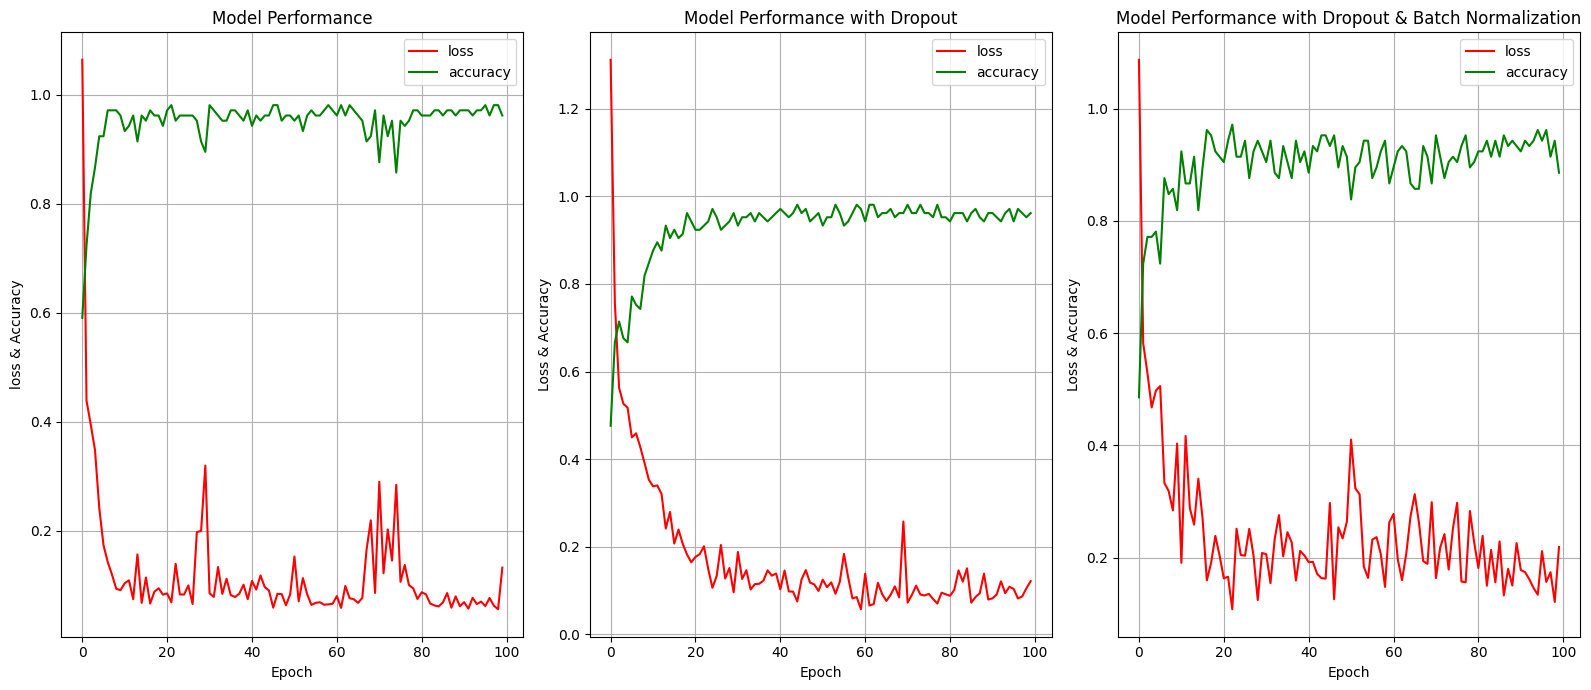

In [35]:
# Membuat visualisasi dalam satu plot
fig, ax = plt.subplots(1,3 , figsize=(16, 7))

# plot model withou dropout and batch normalization
ax[0].plot(hist.history['loss'], label='loss', color='red')
ax[0].plot(hist.history['accuracy'], label='accuracy', color='green')
ax[0].set_title('Model Performance')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('loss & Accuracy')
ax[0].grid(True)
ax[0].legend()

# plot model with dropout
ax[1].plot(hist_drop.history['loss'],label='loss', color='red')
ax[1].plot(hist_drop.history['accuracy'],label='accuracy', color='green')
ax[1].set_title('Model Performance with Dropout')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Loss & Accuracy')
ax[1].grid(True)
ax[1].legend()

# plot model with dropout
ax[2].plot(hist_both.history['loss'],label='loss', color='red')
ax[2].plot(hist_both.history['accuracy'],label='accuracy', color='green')
ax[2].set_title('Model Performance with Dropout & Batch Normalization')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Loss & Accuracy')
ax[2].grid(True)
ax[2].legend()

plt.tight_layout()
plt.show()

## Melakukan Proses Callback

In [36]:
# Class Callback
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs=[]):
    if(logs.get('accuracy')>0.9):
      print('\nAkurasi telah mencapai >90%!')
      self.model.stop_training = True
callbacks = myCallback()

In [37]:
# Model pengujian callback
model_call = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dropout(0.5), # Menggunakan metode dropout untuk mencegah overfitting
    BatchNormalization(momentum=0.99),
    Dense(3, activation='softmax')
])

optimizer = tf.keras.optimizers.Adamax(learning_rate=0.1)
model_call.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [40]:
hist_call = model_call.fit(X_train, y_train, epochs=100, callbacks = [callbacks])

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4619 - loss: 1.0539
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7010 - loss: 0.6720
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6202 - loss: 0.7533
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7294 - loss: 0.5132
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8335 - loss: 0.4149
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7749 - loss: 0.4139
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8071 - loss: 0.3888
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8269 - loss: 0.3734
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8817 - loss: 0.2985
Epoch 10/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8750 - loss: 0.2767
Akurasi telah mencapai >90%!
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8879 - loss: 0.2507


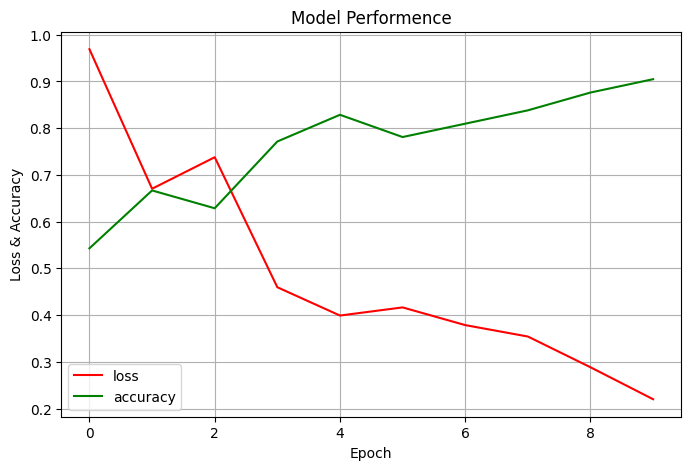

In [41]:
# Menggabungkan visualisasi loss dan accuracy
plt.figure(figsize=(8,5))

plt.plot(hist_call.history['loss'], label='loss', color='red')
plt.plot(hist_call.history['accuracy'], label='accuracy', color='green')

plt.title('Model Performence')
plt.xlabel('Epoch')
plt.ylabel('Loss & Accuracy')
plt.legend()
plt.grid(True)
plt.show()